#  Introduction to Machine Learning with Python


## What will we learn in this class ?

* Types of Machine Learning
* Basic regressors unsing Scikit-learn
* Portfolio replication using regularized regression
*

## Introduction

 The term Machine Learning has had a strong exploration in recent years, particularly since 2006 when Geoffrey Hinton published a paper on how to train a DNN (Deep Neural Network) to recognize handwritten numbers. Training a DNN was considered relatively impossible at the time, and most researchers had abandoned this field in the 1990s.
 
 In recent years the term has hit several industries like a Tsunami after technology companies developed applications that previously seemed unthinkable, but what is Machine Learning?
 
 We can use Arthur Samuel's definition:
 
 _ "Machine Learning is the faithful of study that gives computer the ability to learn without being explicitly programmed_
 
This definition is very important since what we have to understand is that in most cases of Machine Learning, what we do is train a computer to do what a human can do in a very simple way, for example:

- Distinguish between cats and dogs.
- Know if a person is a man or a woman.
- Observe a series of data and find groups in these, etc.

Machine Learning is not the holy grail where we can create a Neural Network, dump nonsense data, and beat the financial markets.


source:

Introduction to Machine Learning by Andrew NG
Introduction to Machine Learning with Python, Mueller and Guido
Understanding Machine Learning Theory and Algorithms by Shia Shalev


## Types of Machine Learning

There are several models of Machine Learning, but in general we can classify them into 2 categories

### Supervised Learning

In the case of SL, the data that we entered the model include the desired results.
An example of SL is _classification_ as is the case of the spam filter in which we introduce the emails to the model as well as the classification of whether it is spam or not.

Another typical task is to predict the price of a house using some characteristics such as the number of rooms, geographical area, square meters, etc. This type of task is called _regresion_ and it is a type of Machine Learning.

### Unsupervised Learning

In this case, the data has no classification and we want the algorithm to give us one. An example of these algorithms is the detection of anomalies such as credit card transactions, where the algorithm finds which ones are fraudulent and which ones are not.



Lets start slow and review our good old friend Linear Regression.The objective is to understand that  large part of the success of these algorithms is found in the evaluation of optimization techniques, once we understand these techniques with simple models we can apply them to more complex models such as neural networks

In the world of machine learning we will talk a lot about the cost function of a model and our objective will be to find the parameters that minimize this function, in the case of linear regression it is:

We know that we can solve a linear regression analytically, using matrix algebra, but in this case we will use optimization techniques.

without any statistical lingo. What we want in linear regression is find a linear combination of the variables that minimizes the square distance to the observed values. 

$$
MSE(X,h_\theta)=\frac{1}{m}\sum_{i=1}^m (\theta^Tx^{(i)}-y^{i})^2
$$




### How can we solve it? ... Gradient Descent

This algorithm aims to find the minimum of a function moving the parameters in the direction indicated by its derivatives. In the case of our cost function, if the derivative is positive, that means that increasing the parameter increases the cost and decreasing the parameter decreases the cost, so our new value for the parameter will be a lower value than the initial one, let's see a graph of this.

<img src = " static/img/GD1.jpg">
Since we know in which direction we should go, we have one more question in this algorithm: what size should the increase or decrease in our new parameter be?
Let's look at two examples:

There is no correct answer, but in this course we will focus on techniques for evaluating our models that will allow us to be more confident in answering these questions.

In [1]:
import numpy as np
%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt
X = 2 * np.random.rand(100, 1)
y = 1 + 2 * X + np.random.randn(100, 1)
X_b = np.c_[np.ones((100, 1)), X]  # Matriz con dos columnas  1s y los valore de X 


In [2]:

eta = 0.1 # Learning Rate
n_iterations = 1000
m = 100
theta = np.random.randn(2,1)

for iteration in range(n_iterations):
    gradients = 2/m * X_b.T.dot(X_b.dot(theta) - y) ## Nota estamos utilizando toda la muestra en cada iteracion
    theta = theta - eta * gradients
theta

array([[0.98986828],
       [2.11847781]])

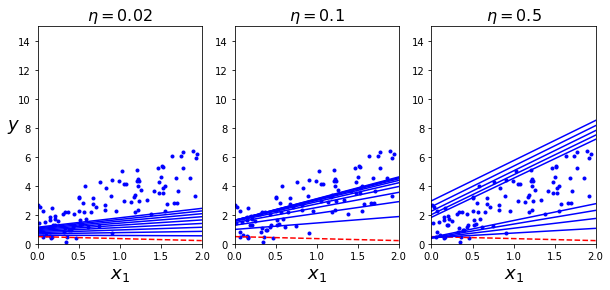

In [3]:
#lets see how it behaves when we change the  learning rate

X_new = np.array([[0], [2]])
X_new_b = np.c_[np.ones((2, 1)), X_new]  

theta_path_bgd = []

def plot_gradient_descent(theta, eta, theta_path=None):
    m = len(X_b)
    plt.plot(X, y, "b.")
    n_iterations = 1000
    for iteration in range(n_iterations):
        if iteration < 10:
            y_predict = X_new_b.dot(theta)
            style = "b-" if iteration > 0 else "r--"
            plt.plot(X_new, y_predict, style)
        gradients = 2/m * X_b.T.dot(X_b.dot(theta) - y)
        theta = theta - eta * gradients
        if theta_path is not None:
            theta_path.append(theta)
    plt.xlabel("$x_1$", fontsize=18)
    plt.axis([0, 2, 0, 15])
    plt.title(r"$\eta = {}$".format(eta), fontsize=16)

np.random.seed(42)
theta = np.random.randn(2,1)  # random initialization

plt.figure(figsize=(10,4))
plt.subplot(131); plot_gradient_descent(theta, eta=0.02)
plt.ylabel("$y$", rotation=0, fontsize=18)
plt.subplot(132); plot_gradient_descent(theta, eta=0.1, theta_path=theta_path_bgd)
plt.subplot(133); plot_gradient_descent(theta, eta=0.5)


plt.show()

## Scikit-Learn



    Simple and efficient tools for predictive data analysis
    Accessible to everybody, and reusable in various contexts
    Built on NumPy, SciPy, and matplotlib
    Open source, commercially usable - BSD license


We will review a few algorithms and see their implementation in Python. As you can see the programming of the algorithms is very light when using this library. With what you have learned you should be able to explore the library and implement any of the algorithms. Today we will review a few. 

In general scikit-learn regressors and classifiers follow the same structure.


1. Initiate instance of object with hyper parameters
2. Use method fit() of instance
3. use fitted instance to create predictions




sources

https://scikit-learn.org/stable/install.html


### Stochastic Gradient Descent

The main problem with GD is the use of the entire sample in each step, which makes the search extremely slow if the sample is very large, to remedy this problem we can use the SGD. The SGD uses only a random sample of our data at each step, speeding up the algorithm considerably. This can be very useful also in cases where the cost function is highly irregular, this allows the algorithm to get out of local minimums thanks to the random samples.

In [4]:
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import SGDRegressor


sgd_reg = SGDRegressor( penalty=None, eta0=0.1)
#utilizamos 5 iteraciones, LR=.1 y no utiliza regularizacion penatly=None
sgd_reg.fit(X, y.ravel())

SGDRegressor(eta0=0.1, penalty=None)

In [5]:

sgd_reg.intercept_, sgd_reg.coef_


(array([0.98605299]), array([2.10814511]))

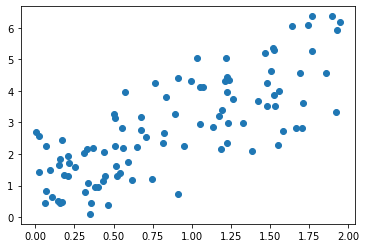

In [6]:
plt.scatter(X,y)

In [7]:
#analytically
lin_reg = LinearRegression(fit_intercept=True)
lin_reg.fit(X, y)
lin_reg.intercept_, lin_reg.coef_

(array([0.98986828]), array([[2.11847781]]))

### Learning curves

To understand the concept of learning curves, let's start by assuming that we have data that does not behave in a linear fashion.
Let's look at a cube shape and use Scikit Learn PolynomialFeatures




In [8]:
import numpy.random as rnd

m = 100
X = 6 * np.random.rand(m, 1) - 3
y = 0.5 * X**3 +2*X**2+ X + 2 + np.random.randn(m, 1)

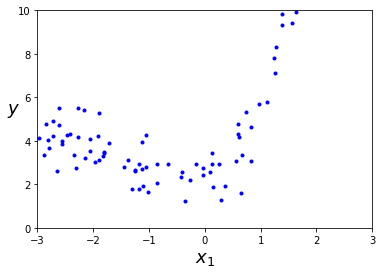

In [9]:
plt.plot(X, y, "b.") #".b" es para punto
plt.xlabel("$x_1$", fontsize=18)
plt.ylabel("$y$", rotation=0, fontsize=18)
plt.axis([-3, 3, 0, 10])

plt.show()

In [10]:

from sklearn.preprocessing import PolynomialFeatures
poly_features = PolynomialFeatures(degree=3, include_bias=False)
X_poly = poly_features.fit_transform(X)
X_poly[0] # creamos X X^2 y X^3

array([0.59195091, 0.35040587, 0.20742307])

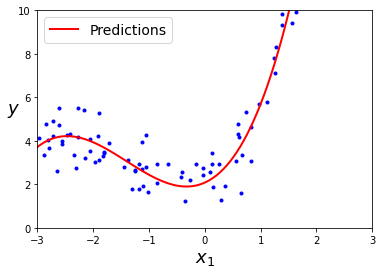

In [11]:
## estimacion en 2 lineas
lin_reg = LinearRegression()
lin_reg.fit(X_poly, y)
# veamos los resultados
X_new=np.linspace(-3, 3, 100).reshape(100, 1)
X_new_poly = poly_features.transform(X_new)
y_new = lin_reg.predict(X_new_poly) #creamos una serie de valores continuos para graficar
plt.plot(X, y, "b.")
plt.plot(X_new, y_new, "r-", linewidth=2, label="Predictions")
plt.xlabel("$x_1$", fontsize=18)
plt.ylabel("$y$", rotation=0, fontsize=18)
plt.legend(loc="upper left", fontsize=14)
plt.axis([-3, 3, 0, 10])

plt.show()

What happens if we try to fit a 10 degree polynomial


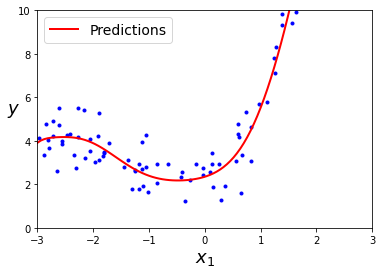

In [12]:
poly_features = PolynomialFeatures(degree=10, include_bias=False)
X_poly = poly_features.fit_transform(X)
lin_reg = LinearRegression()
lin_reg.fit(X_poly, y)
# veamos los resultados
X_new=np.linspace(-3, 3, 100).reshape(100, 1)
X_new_poly = poly_features.transform(X_new)
y_new = lin_reg.predict(X_new_poly)
plt.plot(X, y, "b.")
plt.plot(X_new, y_new, "r-", linewidth=2, label="Predictions")
plt.xlabel("$x_1$", fontsize=18)
plt.ylabel("$y$", rotation=0, fontsize=18)
plt.legend(loc="upper left", fontsize=14)
plt.axis([-3, 3, 0, 10])

plt.show()



Learning curves are graphs that show the performance of a model against data used to calibrate the model and data used out-of-sample. To generate these graphs we will train the model with different groups of data of different sizes and we will graph our cost function as a function of each group of data.

In [13]:
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split
# explicar en pizarron
def plot_learning_curves(model, X, y):
    X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=10)
    train_errors, val_errors = [], []
    for m in range(1, len(X_train)):
        model.fit(X_train[:m], y_train[:m])
        y_train_predict = model.predict(X_train[:m])
        y_val_predict = model.predict(X_val)
        train_errors.append(mean_squared_error(y_train_predict, y_train[:m]))
        val_errors.append(mean_squared_error(y_val_predict, y_val))

    plt.plot(np.sqrt(train_errors), "r-+", linewidth=2, label="train")
    plt.plot(np.sqrt(val_errors), "b-", linewidth=3, label="val")
    plt.legend(loc="upper right", fontsize=14)   
    plt.xlabel("Training set size", fontsize=14) 
    plt.ylabel("RMSE", fontsize=14)              
    

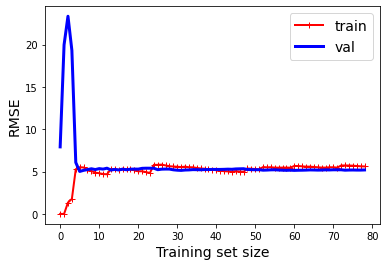

In [14]:
lin_reg = LinearRegression()
plot_learning_curves(lin_reg, X, y)

plt.show()     


What are these curves telling us? Let's look at the training data at the beginning when the sample size is only 2 points, we find that the fit is perfect but as we add more data the model cannot perfectly approach the data and the error increases until it reaches a level where it seems stabilize.

In the case of the OS sample, when we use very little data, the model cannot generalize to all the data, however, as we add more observations, the model can generalize but in the same way it cannot fit the data and stabilizes.

**These types of curves are typical of an underfitting, if the model is not generalizing enough adding more data will not help, it is necessary to add complexity to the model. **

Now let's look at the curves when we use a 10 degree polynomial

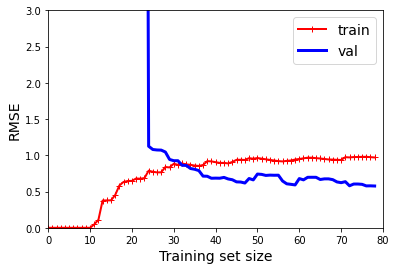

In [15]:
from sklearn.pipeline import Pipeline
#Pipeline nos permite aplicar de forma secuencial una lista de transformaciones a un modelo 

polynomial_regression = Pipeline((
        ("poly_features", PolynomialFeatures(degree=10, include_bias=False)),
        ("lin_reg", LinearRegression()),
    ))

plot_learning_curves(polynomial_regression, X, y)
plt.axis([0, 80, 0, 3])           

plt.show()                        

## Regularization of Linear Models

One way to avoid over estimating linear models is to use regularization, there is no reason not to use regularization in linear models!

### Ridge Regression

To perform this regularization, this model adds the following term to the cost function. This will force the algorithm not only not to get a good estimate but also to keep the model as simple as possible.
The alpha hyperparameter controls how much you want to regularize the model if alpha = 0 we have a linear regression

$$
J(\theta)=MSE(\theta)+\alpha\frac{1}{2}\sum_{i=1}^N\theta_i^2
$$

It is important to scale the magnitude of the data using _StandardScaler_ since this algorithm is sensitive to the magnitude of the data (the same happens with other regularization models) to perform this regression we use the following commands:
```
>>> from sklearn.linear_model import Ridge
>>> ridge_reg = Ridge (alpha = 1, solver = "cholesky")
>>> ridge_reg.fit (X, y)
>>> ridge_reg.predict ([[1.5]])
```


In [16]:
from sklearn.linear_model import Ridge
ridge_reg = Ridge(alpha=1, solver="cholesky")

poly_features = PolynomialFeatures(degree=10, include_bias=False)
X_poly = poly_features.fit_transform(X)

ridge_reg.fit(X_poly, y)
ridge_reg.intercept_, ridge_reg.coef_


(array([2.43432914]),
 array([[ 8.30733535e-01,  9.43977969e-01,  7.98429480e-01,
          6.92746446e-01, -1.11416296e-01, -1.88606968e-01,
          1.59701853e-02,  2.26597280e-02, -8.10828912e-04,
         -9.90284390e-04]]))

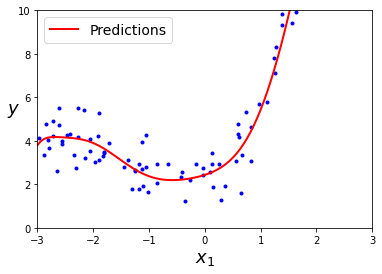

In [17]:
# veamos los resultados
X_new=np.linspace(-3, 3, 100).reshape(100, 1)
X_new_poly = poly_features.transform(X_new)
y_new = ridge_reg.predict(X_new_poly)
plt.plot(X, y, "b.")
plt.plot(X_new, y_new, "r-", linewidth=2, label="Predictions")
plt.xlabel("$x_1$", fontsize=18)
plt.ylabel("$y$", rotation=0, fontsize=18)
plt.legend(loc="upper left", fontsize=14)
plt.axis([-3, 3, 0, 10])

plt.show() 


### Laso Regression

_Least Absolute Shrinkage and Selection Operation Regression_ or simply LASSO is another regularization model but unlike Ridge it tends to completely eliminate the parameters of the models that are not relevant.

$$
J(\theta)=MSE(\theta)+\alpha\frac{1}{2}\sum_{i=1}^N|\theta_i|
$$

In [18]:
from sklearn.linear_model import Lasso
lasso_reg = Lasso(alpha=1)
poly_features = PolynomialFeatures(degree=10, include_bias=False)
X_poly = poly_features.fit_transform(X)
lasso_reg.fit(X_poly, y)
lasso_reg.intercept_, lasso_reg.coef_

/home/jose/venv/p37_python_class/lib/python3.7/site-packages/sklearn/linear_model/_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 108.37873650514436, tolerance: 0.6329282468888714
  positive)


(array([3.49139806]),
 array([ 0.00000000e+00,  0.00000000e+00,  4.23878835e-01,  4.31571575e-01,
         9.52514373e-02,  9.15715190e-05, -5.76084194e-03, -4.62768626e-03,
        -3.92653406e-04,  1.77742070e-04]))

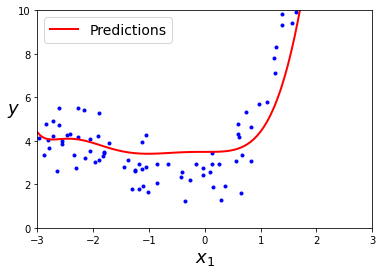

In [19]:
# veamos los resultados
X_new=np.linspace(-3, 3, 100).reshape(100, 1)
X_new_poly = poly_features.transform(X_new)
y_new = lasso_reg.predict(X_new_poly)
plt.plot(X, y, "b.")
plt.plot(X_new, y_new, "r-", linewidth=2, label="Predictions")
plt.xlabel("$x_1$", fontsize=18)
plt.ylabel("$y$", rotation=0, fontsize=18)
plt.legend(loc="upper left", fontsize=14)
plt.axis([-3, 3, 0, 10])

plt.show()

## Case Study Portfolio Replication


Lets see how can we use  our tip toe of Machine Learning for Portfolio Replication.  For this exercise lets load again our PortfolioModels class to get all the closing prices. 





In [20]:
from solutions.utils import PortfolioModels

In [21]:
pm=PortfolioModels(data_repo="data/")
pm.all_closes.head()

importing data: 100%|██████████| 12/12 [00:12<00:00,  1.04s/it]


,PYPL_Stocks__NASDAQ.csv,NFLX_Stocks__NASDAQ.csv,FB_Stocks__NASDAQ.csv,INTC_Stocks__NASDAQ.csv,AAPL_Stocks__NASDAQ.csv,XLE_ETF__AMEX.csv,TSLA_Stocks__NASDAQ.csv,NVDA_Stocks__NASDAQ.csv,GOOG_Stocks__NASDAQ.csv,AMZN_Stocks__NASDAQ.csv,MSFT_Stocks__NASDAQ.csv,QQQ_ETF__NASDAQ.csv
time,,,,,,,,,,,,
2015-07-20 00:00:00-04:00,40.479,110.550,97.910,25.55077,122.0464,57.83311,282.08,19.14255,663.02,488.10,42.58194,109.0322
2015-07-21 00:00:00-04:00,39.350,112.500,98.390,25.20834,120.7896,57.85738,266.77,19.23000,662.30,488.00,42.89959,108.9652
2015-07-22 00:00:00-04:00,38.390,111.465,97.030,25.11176,115.6423,57.40429,267.87,18.85590,662.10,488.27,41.30231,107.7312
2015-07-23 00:00:00-04:00,37.010,110.100,95.430,25.10736,115.6608,57.33148,267.20,19.09396,644.28,482.18,41.84684,107.3007
2015-07-24 00:00:00-04:00,37.020,109.395,96.979,24.63762,115.0324,56.25540,265.41,18.86561,623.56,530.50,41.71978,106.2772


Lets try to replicate  nasdaq using the other assets


In [22]:
X=pm.all_closes[[col for col in pm.all_closes.columns if "QQQ" not in col]]
y=pm.all_closes[[col for col in pm.all_closes.columns if "QQQ"  in col]]


X=np.log(X).diff().dropna()
y=np.log(y).diff().dropna()

print(X.head())
print(y.head())

                           PYPL_Stocks__NASDAQ.csv  NFLX_Stocks__NASDAQ.csv  \
time                                                                          
2015-07-21 00:00:00-04:00                -0.028287                 0.017485   
2015-07-22 00:00:00-04:00                -0.024699                -0.009243   
2015-07-23 00:00:00-04:00                -0.036609                -0.012322   
2015-07-24 00:00:00-04:00                 0.000270                -0.006424   
2015-07-27 00:00:00-04:00                -0.017439                -0.027290   

                           FB_Stocks__NASDAQ.csv  INTC_Stocks__NASDAQ.csv  \
time                                                                        
2015-07-21 00:00:00-04:00               0.004890                -0.013493   
2015-07-22 00:00:00-04:00              -0.013919                -0.003839   
2015-07-23 00:00:00-04:00              -0.016627                -0.000175   
2015-07-24 00:00:00-04:00               0.016101             

In [23]:
import pandas as pd
from sklearn.metrics import mean_squared_error
def plot_results(X_test,y_test,regressor):
    
    re_build=pd.DataFrame((((X_test*regressor.coef_).sum(axis=1)+regressor.intercept_)+1).cumprod())
    re_build.columns=[regressor.__repr__()]

    ax=re_build.plot()
    (y_test+1).cumprod().plot(ax=ax)
    ax.set_title("MSE "+str(round(mean_squared_error(y_test.values,re_build.values),2)))
    
    print(regressor.coef_)

    

In [24]:
#change to log returns

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test=train_test_split( X, y, test_size=0.33, random_state=42,
                                                 shuffle=False)


[[0.04502483 0.03221643 0.05134988 0.08986475 0.15734127 0.07850713
  0.01921793 0.03238851 0.14197835 0.07268065 0.15083516]]


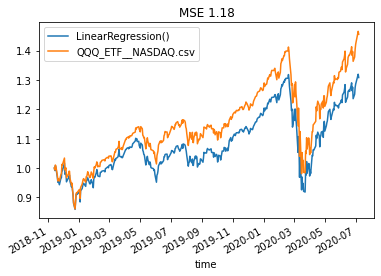

In [25]:
#lets fit a linear regression

lin_reg = LinearRegression()
lin_reg.fit(X_train, y_train)

plot_results(X_test,y_test,lin_reg)


[[0.03410369 0.0408532  0.03584304 0.0336733  0.03671997 0.02389902
  0.02870227 0.0408825  0.03709183 0.03989245 0.03883779]]


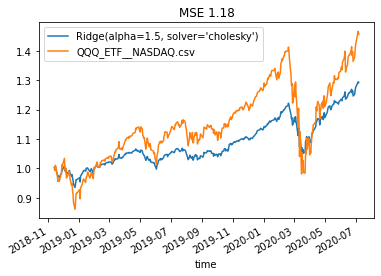

In [26]:
ridge_reg = Ridge(alpha=1.5, solver="cholesky")
ridge_reg.fit(X_train, y_train)

plot_results(X_test,y_test,ridge_reg)

[0.01699661 0.0508449  0.03222036 0.0159459  0.06724048 0.
 0.00841377 0.05320455 0.04601078 0.06926834 0.11565018]


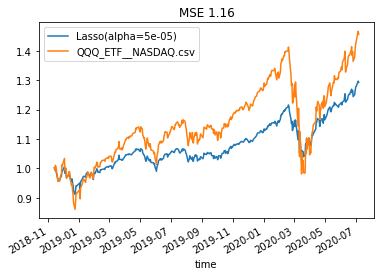

In [27]:
lasso_reg = Lasso(alpha=0.00005)
lasso_reg.fit(X_train, y_train)

plot_results(X_test,y_test,lasso_reg)

Lets try now to see if we can fit to the mistery asset. 




/home/jose/venv/p37_python_class/lib/python3.7/site-packages/pandas/plotting/_matplotlib/core.py:1235: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(xticklabels)


<AxesSubplot:xlabel='time'>

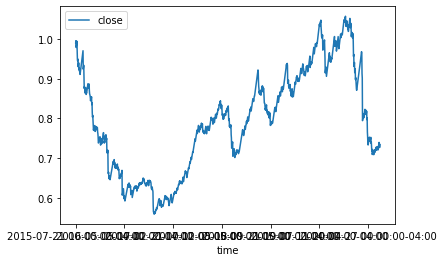

In [28]:
mistery_asset=pd.read_csv("data_cod/mistery_asset.csv",index_col="time")
mistery_asset.plot()

In [29]:
mistery_asset.columns=["mistery"]

mistery_asset.index=pd.to_datetime(mistery_asset.index,utc=True)
m_returns=np.log(mistery_asset).diff().dropna()
X=X.merge(m_returns,right_index=True,left_index=True,how="inner")
X=X[[col for col in X.columns if not "mistery" in col]]
y=m_returns

[[-0.09389298  0.01836314 -0.00723782  0.02141866 -0.03234058  0.0067252
  -0.00137876 -0.0219745   0.04764009  0.06350869 -0.05645671]]


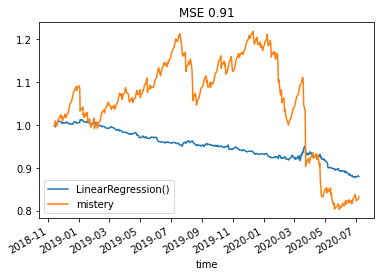

In [30]:
X_train, X_test, y_train, y_test=train_test_split( X, y, test_size=0.33, random_state=42,
                                                 shuffle=False)

lin_reg = LinearRegression()
lin_reg.fit(X_train, y_train)

plot_results(X_test,y_test,lin_reg)


[[-0.01060125  0.00262841 -0.00158539 -0.00135034 -0.00379863 -0.00112418
  -0.00156722 -0.00672278 -0.00015729  0.00331569 -0.00354246]]


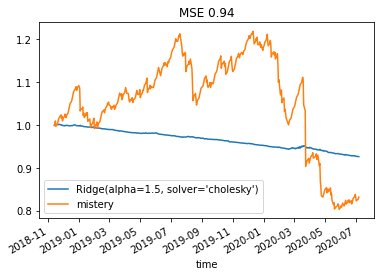

In [31]:
ridge_reg = Ridge(alpha=1.5, solver="cholesky")
ridge_reg.fit(X_train, y_train)

plot_results(X_test,y_test,ridge_reg)



[-0.  0. -0. -0. -0. -0. -0. -0. -0.  0. -0.]


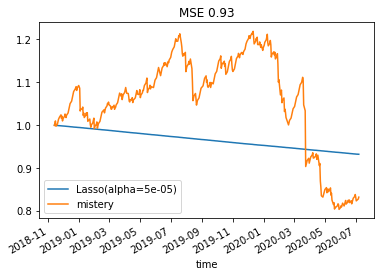

In [32]:
lasso_reg = Lasso(alpha=0.00005)
lasso_reg.fit(X_train, y_train)

plot_results(X_test,y_test,lasso_reg)

# Homework


For your homework you will need to implement from scratch the perceptron algoritmh. This is a good numpy/machine learning exerices. But before you start coding read the tutorial below and the referece below. After seeing all this models applied in scikit-learn and optimizing hyperparameters you shouldnt think that is is an informal science. As a matter of fact machine learning is based in very strong concepts of learnability. If you have time to get more deep in to this I promise you it will be rewarding. Machine Learning is not a brute force technique. many algorithms have bounds and limits just as any econometric model. The mathematics are intense and the road is perilious but the  rewards are worthy


#### 1 Implement Perceptron Algorithm
https://towardsdatascience.com/perceptron-learning-algorithm-d5db0deab975

#### 2 Implement Kneighboars classifier


Can you tell what is the difference?

https://scikit-learn.org/stable/modules/generated/sklearn.neighbors.KNeighborsClassifier.html


sources:

Chapter 9 from Machine Learning Theory and Algorithsm




In [33]:
train_data = [[7.66, 7.7, 0], [1.06, 8.91, 0], [6.43, 7.7, 0], [4.34, 7.61, 0], [8.05, 8.91, 0], [3.03, 6.81, 0], [1.23, 7.4, 0],
              [3.6, 8.8, 0], [5.83, 6.68, 0], [5.3, 6.87, 0], [7.43, 4.54, 1], [8.26, 3.17, 1], [8.59, 5.37, 1], [8.82, 4.48, 1],
              [9.62, 5.73, 1], [9.68, 6.06, 1], [8.55, 5.01, 1], [9.03, 3.86, 1], [11.13, 6.78, 1], [10.8, 4.37, 1]]

test_data = [[10, 8], [10, 6], [8, 3], [6, 7], [5, 5], [5, 4], [3, 10]]


[]

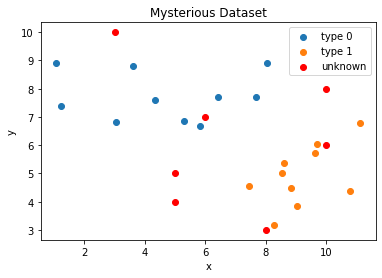

In [34]:
plt.title('Mysterious Dataset')
plt.scatter([x[0] for x in train_data[:10]], [x[1] for x in train_data[:10]], label = 'type 0')
plt.scatter([x[0] for x in train_data[10:]], [x[1] for x in train_data[10:]], label = 'type 1')
plt.scatter([x[0] for x in test_data], [x[1] for x in test_data], c = 'red', label = 'unknown')
plt.xlabel('x')
plt.ylabel('y')
plt.legend()
plt.plot()

You are provided with the above mysterious dataset and you are trying to figure out whether the red unknown points are more like the blue points (type 0) or like the orange points (type 1). For some of the points, it is quite obvious but for others, it is not that clear.



In [35]:
def Perceptron(train_data, test_data):
    pass

def KNClassifier(train_data,test_data):
    pass


SyntaxError: invalid syntax (<ipython-input-35-e16568c0a024>, line 4)